In [1]:
2+2
f(x)=x

f (generic function with 1 method)

In [2]:
iden(x)=x

iden (generic function with 1 method)

In [6]:
using JSON

In [1]:
using ZMQ
using JSON
using JSON3
ctx = Context(1)
s = Socket(ctx, PAIR)
ZMQ.connect(s, "tcp://127.0.0.1:9003")

In [23]:
ZMQ.send(s, "2+12")

In [24]:
msg = ZMQ.recv(s)
res =  String(UInt8.(msg))
JSON3.read(res)["Output"]

14

In [7]:
res =  String(UInt8.(msg))

"{\"Output\":10}"

In [8]:
using JSON

In [9]:
JSON.parse(res)["Output"]*2

20

In [63]:
run(`dir`)

LoadError: IOError: could not spawn `dir`: no such file or directory (ENOENT)

In [101]:
t =String(read(run(`cmd /c echo hello`)))

hello


""

In [105]:
p,=read(run(`cmd /c wolframscript -script D:\\Temp\\sock.wls`))

tcp://127.0.0.1:54458


LoadError: BoundsError: attempt to access 0-element Vector{UInt8} at index [1]

In [106]:
println(p)

UInt8[]


In [100]:
"Run a Cmd object, returning the stdout & stderr contents plus the exit code"
function execute(cmd::Cmd)
  out = Pipe()
  err = Pipe()

  process = run(pipeline(ignorestatus(cmd), stdout=out, stderr=err))
  close(out.in)
  close(err.in)

  (
    stdout = String(read(out)), 
    stderr = String(read(err)),  
    code = process.exitcode
  )
end

execute(`dir`)
execute(`ls --invalid-option`)

LoadError: IOError: could not spawn `dir`: no such file or directory (ENOENT)

In [1]:
function execute(cmd::Cmd)
  out = Pipe()
  err = Pipe()

  process = run(pipeline(ignorestatus(cmd), stdout=out, stderr=err))
  close(out.in)
  close(err.in)
  stdout = @async String(read(out))
  stderr = @async String(read(err))
  (
    stdout = String(read(out)), 
    stderr = String(read(err)),  
    code = process.exitcode
  )
end

execute (generic function with 1 method)

In [2]:
a, = execute(`cmd /c dir C:`); println(a)

SyntaxError: invalid syntax (Temp/ipykernel_20792/4192953321.py, line 1)

In [2]:
a, = execute(`cmd /c cmd /c wolframscript -script D:\\Wolfram_Work\\personal-repo\\juliacallingwolframlanguage\\sock.wls C:`); 

# sc=chop(a, head = 0, tail = 2)


In [4]:
sc

""

In [8]:
using ZMQ
ctx = Context(1)
s = Socket(ctx, PAIR)
ZMQ.connect(s,String(sc))

In [9]:
typeof(String(sc))

String

In [123]:
chop(a, head = 0, tail = 2)

"tcp://127.0.0.1:49735"

In [2]:
ZMQ.send(s, "s1 = NDSolve[{y'[x] == y[x] Cos[x + y[x]], y[0] == 1}, y, {x, 0, 30}];
Table[Evaluate[y[x] /. s1], {x, 0, 30}]")

In [3]:
msg = ZMQ.recv(s)
res =  String(UInt8.(msg))
f = JSON.parse(res)["Output"]
# JSON3.read(res)["Output"]

31-element Vector{Any}:
 Any[1.0]
 Any[0.9913873390555514]
 Any[0.5283578206611237]
 Any[0.20660353335434747]
 Any[0.08807178741377332]
 Any[0.07731208925965385]
 Any[0.16258008843017688]
 Any[0.3735603866555919]
 Any[0.3584106998601269]
 Any[0.16652813572500585]
 Any[0.06434901313289947]
 Any[0.04249864284449634]
 Any[0.07040727661517145]
 ⋮
 Any[0.09847240552668855]
 Any[0.1910258481117187]
 Any[0.1488470139240512]
 Any[0.06092201503448472]
 Any[0.026822441074943002]
 Any[0.025870964111285043]
 Any[0.05711398630942156]
 Any[0.13399362127583792]
 Any[0.14110671300193925]
 Any[0.06625568361604169]
 Any[0.02620210957288905]
 Any[0.019301763999016796]

In [12]:
msg = ZMQ.recv(s)
res =  String(UInt8.(msg))
f = JSON.parse(res)["Output"]


31-element Vector{Any}:
 Any[1.0]
 Any[0.9913873390555514]
 Any[0.5283578206611237]
 Any[0.20660353335434747]
 Any[0.08807178741377332]
 Any[0.07731208925965385]
 Any[0.16258008843017688]
 Any[0.3735603866555919]
 Any[0.3584106998601269]
 Any[0.16652813572500585]
 Any[0.06434901313289947]
 Any[0.04249864284449634]
 Any[0.07040727661517145]
 ⋮
 Any[0.09847240552668855]
 Any[0.1910258481117187]
 Any[0.1488470139240512]
 Any[0.06092201503448472]
 Any[0.026822441074943002]
 Any[0.025870964111285043]
 Any[0.05711398630942156]
 Any[0.13399362127583792]
 Any[0.14110671300193925]
 Any[0.06625568361604169]
 Any[0.02620210957288905]
 Any[0.019301763999016796]

In [1]:
 cd("D:\\Wolfram_Work\\personal-repo\\juliacallingwolframlanguage\\Wolfram\\src")
include("WOlfram.jl")
p=Wolfram.SocketConnect("5558")

ZMQ.Socket(Ptr{Nothing} @0x0000000000000000, FileWatching._FDWatcher(Ptr{Nothing} @0x0000000000000000, 0, (0, 0), Base.GenericCondition{Base.Threads.SpinLock}(Base.InvasiveLinkedList{Task}(nothing, nothing), Base.Threads.SpinLock(0)), 0, (false, false)))

In [2]:
using ZMQ

In [4]:
ZMQ.send(p,"2+2")

LoadError: StateError("Unknown error")

In [ ]:
sc=chop(a, head = 0, tail = 2)

In [14]:
convert(Vector{Float64}, f)

LoadError: MethodError: [0mCannot `convert` an object of type [92mVector{Any}[39m[0m to an object of type [91mFloat64[39m
[0mClosest candidates are:
[0m  convert(::Type{T}, [91m::T[39m) where T<:Number at C:\Users\suman\AppData\Local\Programs\Julia-1.7.0\share\julia\base\number.jl:6
[0m  convert(::Type{T}, [91m::Number[39m) where T<:Number at C:\Users\suman\AppData\Local\Programs\Julia-1.7.0\share\julia\base\number.jl:7
[0m  convert(::Type{T}, [91m::Base.TwicePrecision[39m) where T<:Number at C:\Users\suman\AppData\Local\Programs\Julia-1.7.0\share\julia\base\twiceprecision.jl:262
[0m  ...

In [4]:
t=hcat(f...)

1×31 Matrix{Float64}:
 1.0  0.991387  0.528358  0.206604  …  0.0662557  0.0262021  0.0193018

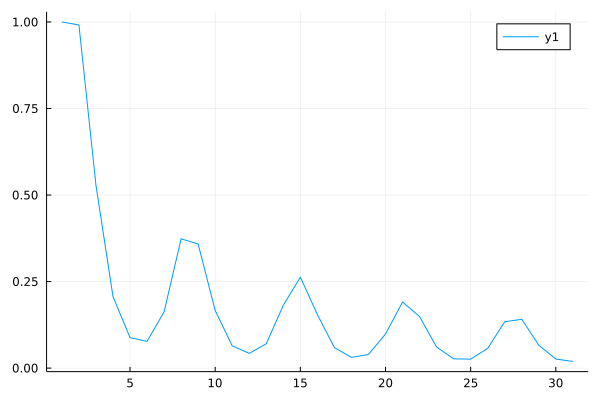

In [7]:
using Plots
x = 1:31; y = rand(10); # These are the plotting data
plot(x, t')